# Chapter 7

## 7.1 SLR

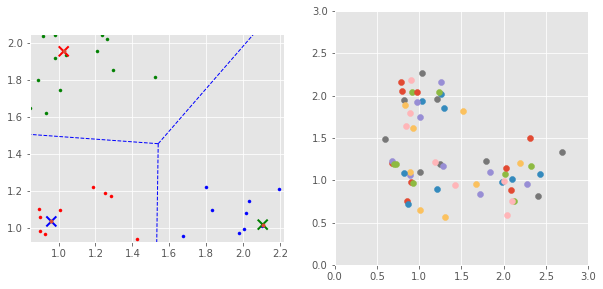

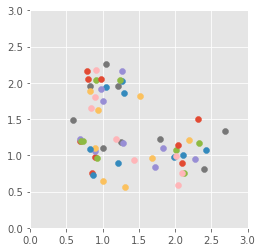

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.linalg import svd
from sklearn.cluster import KMeans

plt.style.use('ggplot')

c1 = np.random.multivariate_normal([1, 1], 0.05 * np.eye(2), 20)
c2 = np.random.multivariate_normal([1, 2], 0.05 * np.eye(2), 20)
c3 = np.random.multivariate_normal([2, 1], 0.05 * np.eye(2), 20)

c1 = np.column_stack((c1, c1[:, 1]))
c2 = np.column_stack((c2, c2[:, 1]))
c3 = np.column_stack((c3, c3[:, 1]))

data = np.vstack((c1, c2, c3))

kmeans = KMeans(n_clusters=3, random_state=42).fit(data[:, :2])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

p1, p2, p3 = centers

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis([0, 3, 0, 3])
plt.axis("square")
plt.scatter(c1[:, 0], c1[:, 1], color='r', marker='.')
plt.scatter(c2[:, 0], c2[:, 1], color='g', marker='.')
plt.scatter(c3[:, 0], c3[:, 1], color='b', marker='.')
plt.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], color=['r', 'g', 'b'], marker='x', s=100, linewidths=2)

vor = Voronoi([p1, p2, p3])
voronoi_plot_2d(vor, plt.gca(), show_vertices=False, line_colors='b')

data_transformed = data @ np.array([[1, 0, 1], [0, 1, 1], [0, 0, 0]])
plt.subplot(1, 2, 2)
plt.axis([0, 3, 0, 3])
plt.axis("square")

U, S, Vt = svd(data_transformed)
U = U - np.min(U, axis=0)
U = U / np.max(U, axis=0)

for i in range(60):
    plt.scatter(data_transformed[i, 0], data_transformed[i, 1], marker='o')

plt.show()
plt.axis([0, 3, 0, 3])
plt.axis("square")

U, S, Vt = svd(data_transformed)
U = U - np.min(U, axis=0)
U = U / np.max(U, axis=0)

for i in range(60):
    plt.scatter(data_transformed[i, 0], data_transformed[i, 1], marker='o')

plt.show()

## 7.2 SLR 1 

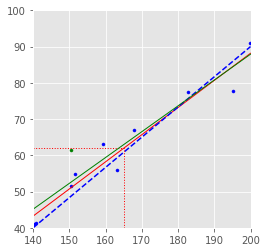

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
h = 60 * np.random.rand(N, 1) + 140
w = (h - 92) * 5 / 6 + np.random.normal(0, 5, (N, 1))

mh = np.mean(h)
mw = np.mean(w)

p = np.polyfit(h.flatten(), w.flatten(), 1)

hmin, hmax = 140, 200
wmin, wmax = 40, 90

plt.figure()
plt.axis([hmin, hmax, wmin, wmax])
plt.axis("square")
plt.scatter(h, w, color='b', marker='.')
plt.plot([hmin, hmax], np.polyval(p, [hmin, hmax]), 'r', linewidth=1)
plt.plot([hmin, hmax], [(hmin - 92) * 5 / 6, (hmax - 92) * 5 / 6], 'b--')
plt.plot([mh, mh], [wmin, mw], 'r:', linewidth=1)
plt.plot([hmin, mh], [mw, mw], 'r:', linewidth=1)

w1 = w.copy()
w1[8] += 10  

p1 = np.polyfit(h.flatten(), w1.flatten(), 1)
plt.scatter(h[8], w1[8], color='g', marker='.')
plt.plot([hmin, hmax], np.polyval(p1, [hmin, hmax]), 'g', linewidth=1)

plt.show()

M = np.arange(2, N + 2)


## 7.3 Regression

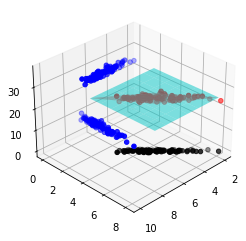

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

n = 100
B = np.array([5, 2, 2])
a, b, c = 5, 2, 2
mu = np.array([5, 5])
cv = -0.99
sigma = np.array([[1, cv], [cv, 1]])
noise = 1

X = np.random.multivariate_normal(mu, sigma, n)
X = np.column_stack((np.ones(n), X))

muX = np.mean(X, axis=0)
XC = X - np.ones((n, 1)) * muX
nCov = XC.T @ XC
nCovD = np.diag(np.diag(nCov))
M = np.outer(muX, muX)
SM = nCov + n * M
SMD = nCovD + n * M

e = np.random.normal(0, noise, n)

y = a + b * X[:, 1] + c * X[:, 2]
ye = y + e

S = X.T @ X
Bhat = np.linalg.inv(S) @ X.T @ ye
BhatD = np.linalg.inv(SMD) @ X.T @ ye

x1 = np.arange(mu[0] - 3, mu[0] + 4, 1)
x2 = np.arange(mu[1] - 3, mu[1] + 4, 1)
z = np.zeros((len(x2), len(x1)))
zhat = np.zeros_like(z)
zhatD = np.zeros_like(z)

for i in range(len(x1)):
    for j in range(len(x2)):
        z[j, i] = a + b * x1[i] + c * x2[j]
        zhat[j, i] = Bhat[0] + Bhat[1] * x1[i] + Bhat[2] * x2[j]
        zhatD[j, i] = BhatD[0] + BhatD[1] * x1[i] + BhatD[2] * x2[j]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], ye, color='r', label='Observed')
ax.scatter(X[:, 1], np.full_like(y, mu[1] - 5), ye, color='b')
ax.scatter(np.full_like(y, mu[0] + 5), X[:, 2], ye, color='b')
ax.scatter(X[:, 1], X[:, 2], np.zeros_like(y), color='k')

X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, zhatD, color='cyan', alpha=0.5)
ax.plot_surface(X1, X2, z, color='gray', alpha=0.5)
ax.view_init(elev=30, azim=45)
plt.show()

## 7.4 SLR Class

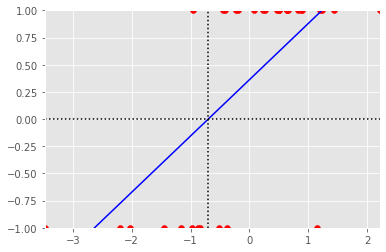

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

mupos, muneg = 1, -1
Pos, Neg = 20, 10

px = np.random.normal(mupos, 1, Pos)
nx = np.random.normal(muneg, 1, Neg)
x = np.concatenate((px, nx))
y = np.concatenate((np.ones(Pos), -np.ones(Neg)))

xmin, xmax = np.min(x), np.max(x)
x = np.column_stack((np.ones_like(x), x))

B = np.linalg.inv(x.T @ x) @ x.T @ y

plt.figure()
plt.scatter(x[:, 1], y, color='r', label='Data')
plt.scatter(np.mean(px), 1, color='r', marker='o')
plt.scatter(np.mean(nx), -1, color='r', marker='o')

xaxis = np.arange(xmin, xmax, 0.1)
ymin, ymax = B[0] + B[1] * xmin, B[0] + B[1] * xmax
plt.plot([xmin, xmax], [ymin, ymax], 'b-')
plt.axhline(0, linestyle=':', color='k')
plt.axvline(np.mean(x[:, 1]) - np.mean(y) / B[1], linestyle=':', color='k')
plt.xlim([xmin, xmax])
plt.ylim([-1, 1])
plt.show()

## 7.6 Linclass

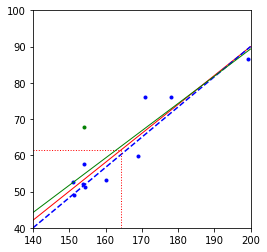

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
h = 60 * np.random.rand(N, 1) + 140
w = (h - 92) * 5 / 6 + np.random.normal(0, 5, (N, 1))

mh = np.mean(h)
mw = np.mean(w)

p = np.polyfit(h.flatten(), w.flatten(), 1)

hmin, hmax = 140, 200
wmin, wmax = 40, 90

plt.figure()
plt.axis([hmin, hmax, wmin, wmax])
plt.axis("square")
plt.scatter(h, w, color='b', marker='.')
plt.plot([hmin, hmax], np.polyval(p, [hmin, hmax]), 'r', linewidth=1)
plt.plot([hmin, hmax], [(hmin - 92) * 5 / 6, (hmax - 92) * 5 / 6], 'b--')
plt.plot([mh, mh], [wmin, mw], 'r:', linewidth=1)
plt.plot([hmin, mh], [mw, mw], 'r:', linewidth=1)

w1 = w.copy()
w1[8] += 10  

p1 = np.polyfit(h.flatten(), w1.flatten(), 1)
plt.scatter(h[8], w1[8], color='g', marker='.')
plt.plot([hmin, hmax], np.polyval(p1, [hmin, hmax]), 'g', linewidth=1)

plt.show()

M = np.arange(2, N + 2)


## 7.12 Logcallin

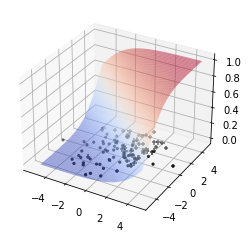

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mupos, sigpos, rhopos = [1, 1], [3, 3], 0
muneg, signeg, rhoneg = [-1, -1], [3, 3], 0

covpos = rhopos * np.sqrt(sigpos[0] * sigpos[1])
sigmapos = [[sigpos[0], covpos], [covpos, sigpos[1]]]
covneg = rhoneg * np.sqrt(signeg[0] * signeg[1])
sigmaneg = [[signeg[0], covneg], [covneg, signeg[1]]]

Npos, Nneg = 50, 50
N = Npos + Nneg

pos = multivariate_normal.rvs(mean=mupos, cov=sigmapos, size=Npos)
neg = multivariate_normal.rvs(mean=muneg, cov=sigmaneg, size=Nneg)

pos1 = np.column_stack((np.ones(Npos), pos))
neg1 = np.column_stack((np.ones(Nneg), neg))

emupos1, emuneg1 = np.mean(pos1, axis=0), np.mean(neg1, axis=0)
blc = (emupos1 - emuneg1).T

dpos = pos @ blc[1:]
dneg = neg @ blc[1:]
mdpos, mdneg = np.mean(dpos), np.mean(dneg)
vard = np.var(np.concatenate((dpos - mdpos, dneg - mdneg)), ddof=1)
a = (mdpos - mdneg) / vard
d0 = (mdpos + mdneg) / 2

mn, mx = -5, 5
x_vals = np.arange(mn, mx, 0.1)
y_vals = np.arange(mn, mx, 0.1)
Plog = np.zeros((len(y_vals), len(x_vals)))

for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        LR = np.exp(a * (np.dot([1, x, y], blc) - d0))
        Plog[j, i] = LR / (LR + 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], color='k', marker='+')
ax.scatter(neg[:, 0], neg[:, 1], color='k', marker='.')
X, Y = np.meshgrid(x_vals, y_vals)
ax.plot_surface(X, Y, Plog, cmap='coolwarm', alpha=0.5)
plt.show()

## 7.14 Linkernel

<module 'matplotlib.pyplot' from '/home/ck22122/anaconda3/envs/clmr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

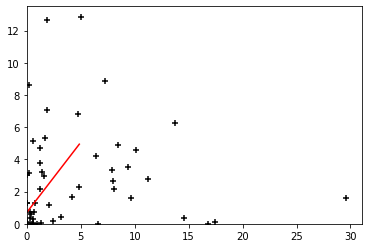

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mupos, sigpos, rhopos = [1, 1], [3, 3], 0
muneg, signeg, rhoneg = [-1, -1], [3, 3], 0

covpos = rhopos * np.sqrt(sigpos[0] * sigpos[1])
sigmapos = [[sigpos[0], covpos], [covpos, sigpos[1]]]
covneg = rhoneg * np.sqrt(signeg[0] * signeg[1])
sigmaneg = [[signeg[0], covneg], [covneg, signeg[1]]]

Npos, Nneg = 50, 50
N = Npos + Nneg

pos = multivariate_normal.rvs(mean=mupos, cov=sigmapos, size=Npos)
neg = multivariate_normal.rvs(mean=muneg, cov=sigmaneg, size=Nneg)

posF = pos ** 2
negF = neg ** 2

pos1F = np.column_stack((np.ones(Npos), posF))
neg1F = np.column_stack((np.ones(Nneg), negF))

emupos1F, emuneg1F = np.mean(pos1F, axis=0), np.mean(neg1F, axis=0)
t = (np.dot(emupos1F, emupos1F) - np.dot(emuneg1F, emuneg1F)) / 2
blc = (emupos1F - emuneg1F).T + np.array([-t, 0, 0])

dpos = np.dot(posF, blc[1:])
dneg = np.dot(negF, blc[1:])
mdpos, mdneg = np.mean(dpos), np.mean(dneg)
vard = np.var(np.concatenate((dpos - mdpos, dneg - mdneg)), ddof=1)
a = (mdpos - mdneg) / vard
d0 = 0

step, mn, mx = 0.02, 0, 5
x_vals = np.arange(mn, mx, step)
y_vals = np.arange(mn, mx, step)
PblcF = np.zeros((len(y_vals), len(x_vals)))

for i, x in enumerate(x_vals):
    for j, y in enumerate(y_vals):
        LR = np.exp(a * (np.dot([1, x, y], blc) - d0))
        PblcF[j, i] = LR / (LR + 1)

grid_x, grid_y = np.meshgrid(x_vals, y_vals)
plt.figure()
plt.contour(grid_x, grid_y, PblcF, levels=[0.5], colors='r')
plt.scatter(posF[:, 0], posF[:, 1], marker='+', color='k')
plt

## Roc Callin